# Final Project Amazon Product Reviews

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word, Blobber
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
header={'User-Agent': 'Chrome/108.0.5359.99','referer':'https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'}


In [ ]:
cookie={} # insert request cookies within{}
def getAmazonSearch(search_query):
    url="https://www.amazon.com/s?k="+search_query
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [ ]:
def Searchreviews(review_link):
    url="https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+review_link
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [ ]:
reviews=[]
for k in range(500):
  response=Searchreviews('&pageNumber='+str(k))
  soup=BeautifulSoup(response.content)
  for i in soup.findAll("span",{'data-hook':"review-body"}):
    reviews.append(i.text)

https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_

In [ ]:
reviews

['\nThis device is sleek and compact, making it perfect for any room in the house. The sound quality is impressive for its size and the addition of the virtual assistant, Alexa, makes it incredibly easy to use.One of the standout features of the Echo Dot is its ability to control smart home devices. With the simple command of "Alexa, turn off the lights," I can easily control all of my connected devices without even having to get up. This feature alone has been a game changer for me and has made my daily routine much more efficient.Another great feature is the ability to play music from a variety of sources. Whether I want to listen to my favorite playlist on Spotify or catch up on the latest news, the Echo Dot has me covered. The device also integrates seamlessly with other Echo devices, allowing me to fill my entire home with sound.Overall, I highly recommend the Echo Dot (3rd Gen, 2018 release) to anyone looking to add a versatile and convenient smart device to their home. It has ex

In [ ]:
len(reviews)

5000

In [ ]:
ratings=[]
for k in range(500):
  response=Searchreviews('&pageNumber='+str(k))
  soup=BeautifulSoup(response.content)
  for i in soup.findAll("i",{'data-hook':"review-star-rating"}):
    ratings.append(i.text)

https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_

In [ ]:
ratings

['5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '1.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '1.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out o

In [ ]:
len(ratings)

5000

In [ ]:
review_title=[]
for k in range(500):
  response=Searchreviews('&pageNumber='+str(k))
  soup=BeautifulSoup(response.content)
  for i in soup.findAll("a",{'data-hook':"review-title"}):
    review_title.append(i.text)

https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_

In [ ]:
review_title

['\nUpgrade your home with the versatile and convenient Echo Dot\n',
 "\nThis system has been ruined at Amazon's choice\n",
 '\nAlexa is my best friend.\n',
 '\nGreat sound\n',
 '\nNice little unit.\n',
 '\nHappy (and amused) with my unit\n',
 "\nA great device for it's price!\n",
 '\nBuen sonido, compacta y bonita | Good sound, compact and pretty\n',
 '\nGreat for Seniors\n',
 '\nLove\n',
 '\nUpgrade your home with the versatile and convenient Echo Dot\n',
 "\nThis system has been ruined at Amazon's choice\n",
 '\nAlexa is my best friend.\n',
 '\nGreat sound\n',
 '\nNice little unit.\n',
 '\nHappy (and amused) with my unit\n',
 "\nA great device for it's price!\n",
 '\nBuen sonido, compacta y bonita | Good sound, compact and pretty\n',
 '\nGreat for Seniors\n',
 '\nLove\n',
 '\nYou can still request a specific album or artist!!\n',
 '\n☆Read This - Before You Buy Any Alexa Device - Seriously ☆\n',
 '\nSince Amazon laid off the team. . . .yikes.\n',
 '\nDifficulties connecting with jus

In [ ]:
len(review_title)

5000

In [ ]:
review_date=[]
for k in range(500):
  response=Searchreviews('&pageNumber='+str(k))
  soup=BeautifulSoup(response.content)
  for i in soup.findAll("span",{'data-hook':"review-date"}):
    review_date.append(i.text)

https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_

In [ ]:
review_date

['Reviewed in the United States 🇺🇸 on December 13, 2022',
 'Reviewed in the United States 🇺🇸 on November 14, 2022',
 'Reviewed in the United States 🇺🇸 on December 8, 2022',
 'Reviewed in the United States 🇺🇸 on December 8, 2022',
 'Reviewed in the United States 🇺🇸 on December 4, 2022',
 'Reviewed in the United States 🇺🇸 on September 3, 2021',
 'Reviewed in the United States 🇺🇸 on December 4, 2022',
 'Reviewed in the United States 🇺🇸 on December 12, 2022',
 'Reviewed in the United States 🇺🇸 on December 9, 2022',
 'Reviewed in the United States 🇺🇸 on December 10, 2022',
 'Reviewed in the United States 🇺🇸 on December 13, 2022',
 'Reviewed in the United States 🇺🇸 on November 14, 2022',
 'Reviewed in the United States 🇺🇸 on December 8, 2022',
 'Reviewed in the United States 🇺🇸 on December 8, 2022',
 'Reviewed in the United States 🇺🇸 on December 4, 2022',
 'Reviewed in the United States 🇺🇸 on September 3, 2021',
 'Reviewed in the United States 🇺🇸 on December 4, 2022',
 'Reviewed in the Unite

In [ ]:
len(review_date)

5000

In [ ]:
updated_ratings=[]
for i in ratings:
  updated_ratings.append(int(i[0:1]))

In [ ]:
len(updated_ratings)

5000

In [ ]:
updated_dates=[]
for i in review_date:
  updated_dates.append(i[36:])

In [ ]:
updated_dates

['December 13, 2022',
 'November 14, 2022',
 'December 8, 2022',
 'December 8, 2022',
 'December 4, 2022',
 'September 3, 2021',
 'December 4, 2022',
 'December 12, 2022',
 'December 9, 2022',
 'December 10, 2022',
 'December 13, 2022',
 'November 14, 2022',
 'December 8, 2022',
 'December 8, 2022',
 'December 4, 2022',
 'September 3, 2021',
 'December 4, 2022',
 'December 12, 2022',
 'December 9, 2022',
 'December 10, 2022',
 'December 7, 2022',
 'August 4, 2020',
 'December 5, 2022',
 'December 6, 2022',
 'December 21, 2019',
 'December 5, 2022',
 'December 5, 2022',
 'December 6, 2022',
 'December 5, 2022',
 'December 3, 2022',
 'December 2, 2022',
 'December 5, 2022',
 'December 9, 2022',
 'December 11, 2022',
 'December 12, 2022',
 'October 21, 2022',
 'November 13, 2022',
 'December 3, 2022',
 'November 29, 2022',
 'December 8, 2022',
 'December 5, 2022',
 'November 27, 2022',
 'December 5, 2022',
 'October 7, 2022',
 'December 2, 2022',
 'December 6, 2022',
 'December 11, 2022',

In [ ]:
data = {'Product': 'Alexa - Echo Dot (3rd Gen, 2018 release)',
        'Rating': updated_ratings,
        'Review_Title':review_title,
        'Review':reviews,
        'Review_date':updated_dates}
 
df = pd.DataFrame(data)
df

,Product,Rating,Review_Title,Review,Review_date
0,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nUpgrade your home with the versatile and con...,"\nThis device is sleek and compact, making it ...","December 13, 2022"
1,"Alexa - Echo Dot (3rd Gen, 2018 release)",4,\nThis system has been ruined at Amazon's choi...,"\nLoved my 9, yes, 9, echo dots (not including...","November 14, 2022"
2,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nAlexa is my best friend.\n,\nI love Alexa! I do not know how I can get al...,"December 8, 2022"
3,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nGreat sound\n,\nI have finally stepped into the 21st Century...,"December 8, 2022"
4,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nNice little unit.\n,\nThis was my second echo unit for me. I neede...,"December 4, 2022"
...,...,...,...,...,...
4995,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nIf it's your first Echo Dot read this\n,\nThis is the perfect Echo Dot to try on your ...,"July 30, 2020"
4996,"Alexa - Echo Dot (3rd Gen, 2018 release)",4,"\npain to get going, can't do it on a computer...",\nSetting up and registering is a real pain be...,"January 22, 2022"
4997,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nGreat\n,\nNeeded one for my garage was perfect\n,"June 16, 2022"
4998,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\neasy set up\n,\nworks great\n,"July 7, 2022"


In [ ]:
df.shape

(5000, 5)

In [ ]:
def f(df):
  if df['Rating'] == 3:
    val = 'Neutral'
  elif df['Rating'] == 1 or df['Rating'] == 2:
    val = 'Negative'
  elif df['Rating'] == 4 or df['Rating'] == 5:
    val = 'Positive'
  else:
    val = -1
  return val

In [ ]:
df['Sentiment'] = df.apply(f, axis=1)
df.head()

,Product,Rating,Review_Title,Review,Review_date,Sentiment
0,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nUpgrade your home with the versatile and con...,"\nThis device is sleek and compact, making it ...","December 13, 2022",Positive
1,"Alexa - Echo Dot (3rd Gen, 2018 release)",4,\nThis system has been ruined at Amazon's choi...,"\nLoved my 9, yes, 9, echo dots (not including...","November 14, 2022",Positive
2,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nAlexa is my best friend.\n,\nI love Alexa! I do not know how I can get al...,"December 8, 2022",Positive
3,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nGreat sound\n,\nI have finally stepped into the 21st Century...,"December 8, 2022",Positive
4,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nNice little unit.\n,\nThis was my second echo unit for me. I neede...,"December 4, 2022",Positive


In [ ]:
df['Sentiment'].value_counts()

Positive    4780
Neutral      176
Negative      44
Name: Sentiment, dtype: int64

In [ ]:
def review_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df['Review']=df['Review'].apply(lambda x:review_cleaning(x))
df.head()

,Product,Rating,Review_Title,Review,Review_date,Sentiment
0,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nUpgrade your home with the versatile and con...,this device is sleek and compact making it per...,"December 13, 2022",Positive
1,"Alexa - Echo Dot (3rd Gen, 2018 release)",4,\nThis system has been ruined at Amazon's choi...,loved my yes echo dots not including those b...,"November 14, 2022",Positive
2,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nAlexa is my best friend.\n,i love alexa i do not know how i can get along...,"December 8, 2022",Positive
3,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nGreat sound\n,i have finally stepped into the century my gd...,"December 8, 2022",Positive
4,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nNice little unit.\n,this was my second echo unit for me i needed s...,"December 4, 2022",Positive


In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df['Review'].head()

0    device sleek compact making perfect room house...
1    loved yes echo dots including bought gifts fri...
2    love alexa know get along without reminds need...
3    finally stepped century gdaughers would say iv...
4    second echo unit needed something extend range...
Name: Review, dtype: object

In [ ]:
ps = PorterStemmer()
review_features=df.copy()
review_features=review_features[['Review']].reset_index(drop=True)
review_features.head()

corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['Review'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)    

In [ ]:
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(w).lemmatize() for w in x.split()]))
df['Review'].head()

0    device sleek compact making perfect room house...
1    loved yes echo dot including bought gift frien...
2    love alexa know get along without reminds need...
3    finally stepped century gdaughers would say iv...
4    second echo unit needed something extend range...
Name: Review, dtype: object

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
X= tfidf_vectorizer.fit_transform(review_features['Review'])

In [ ]:
X.shape

(5000, 5000)

In [ ]:
y = df['Sentiment']

In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

In [ ]:
nb_cv = BernoulliNB()
nb_cv.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred = nb_cv.predict(X_test)
y_pred

array(['Neutral', 'Negative', 'Positive', ..., 'Neutral', 'Negative',
       'Positive'], dtype='<U8')

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8912


In [ ]:
print('--------------------------------------------------------------------------')
print('Classification report')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------------------')
print('Confusion matrix ->')
print('--------------------------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Classification report
--------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       1.00      0.98      0.99      1231
     Neutral       0.97      0.72      0.82      1206
    Positive       0.76      0.98      0.85      1148

    accuracy                           0.89      3585
   macro avg       0.91      0.89      0.89      3585
weighted avg       0.91      0.89      0.89      3585

--------------------------------------------------------------------------
Confusion matrix ->
--------------------------------------------------------------------------
[[1202    8   21]
 [   0  867  339]
 [   0   22 1126]]
--------------------------------------------------------------------------


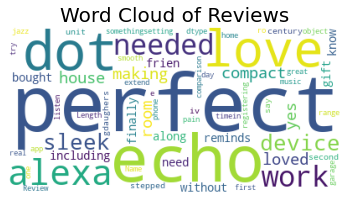

In [ ]:
wordcloud = WordCloud(background_color = 'white', stopwords = STOPWORDS).generate(str(df['Review']))
plt.title('Word Cloud of Reviews', fontsize = 20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()